<a href='https://www.hexnbit.com/'> <img src='https://www.hexnbit.com/wp-content/uploads/2019/09/hexnbit_final_66px.png'/> </a>

### Task 1

Read and display "mall_customers.csv"

In [2]:
import pandas as pd

df = pd.read_csv("mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Task 2

Perform Exploratory Data Analytics and mention atleast 2 inferences from the visualizations

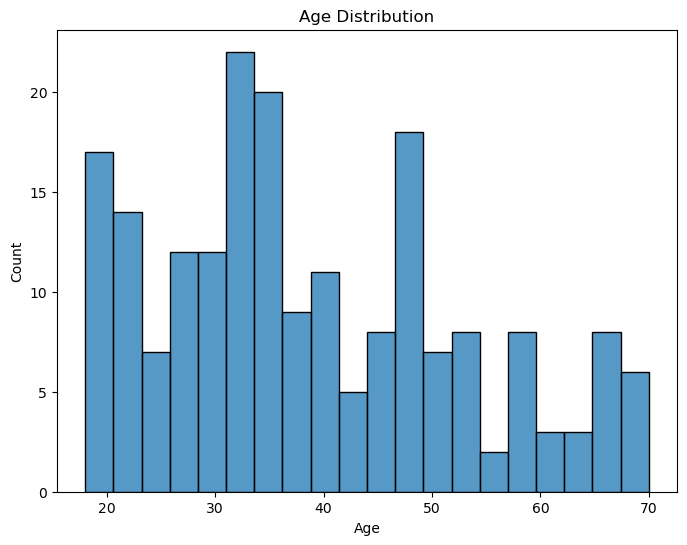

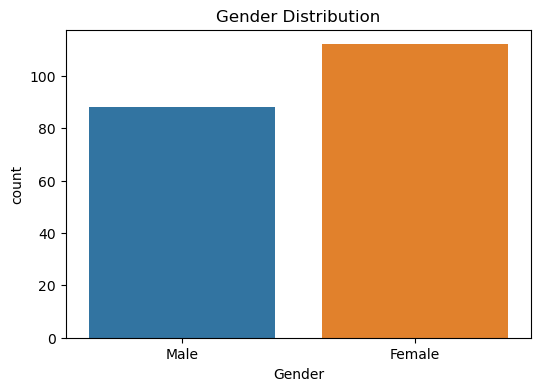

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20)
plt.title('Age Distribution')
plt.show()

# Plot 2: Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

# Inferences:
# 1: Most customers are in the age range of 20 to 40 years.
# 2: The number of female customers is slightly higher than male customers.


### Task 3

Plot the Elbow Plot in  order to implement K-Means Clustering and write the value of selected K

C:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

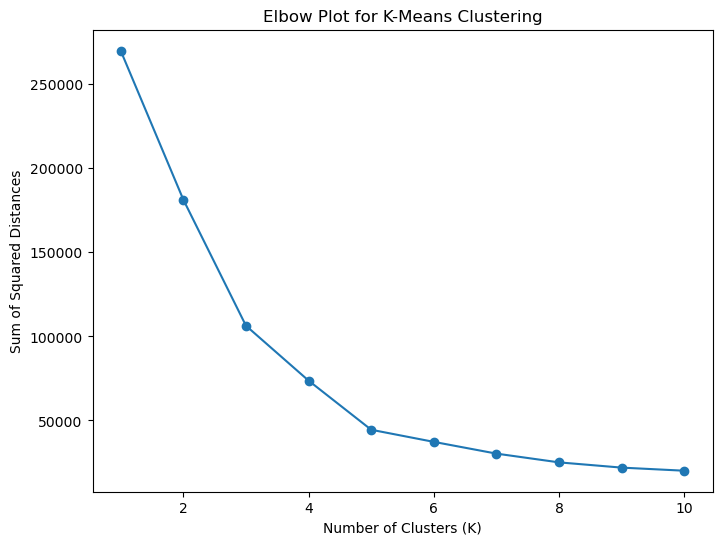

In [4]:
from sklearn.cluster import KMeans

# Selecting features for clustering
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Calculate the sum of squared distances for different values of K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Plot for K-Means Clustering')
plt.show()

# Based on the Elbow Plot, we can select K=5 as the value for clustering.

### Task 4

With selected K value, perform K-Means Clustering to cluster the customers

In [5]:
# Performing K-Means Clustering with K=5
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

C:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Task 5

Add the predicted cluster labels to the main dataframe as a new column and display the complete dataframe

In [6]:
# Displaying the complete dataframe with cluster labels
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


### Task 6

Create a scatter plot (Annual Income  vs Spending Score) and colour code the scatter plot as per the clustered customers<br>
**HINT :** df.plot.scatter

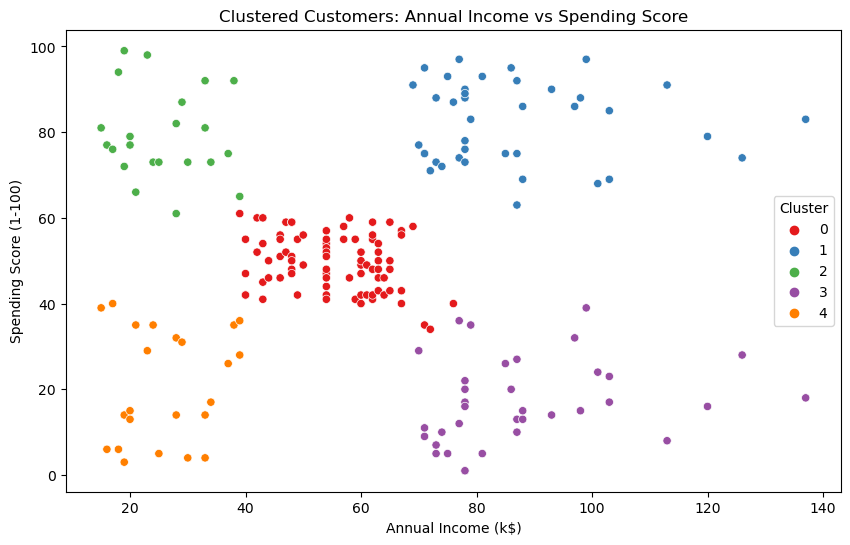

In [7]:
# Scatter plot of Annual Income vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustered Customers: Annual Income vs Spending Score')
plt.show()


### Task 7

Answer the following questions as per the scatter plot created above and as per your understanding of the topics:-<br>
Write the colour codes or cluster number from the above scatter plot in your answer

a) If you were a bank, who would you target for loan purpose?

I would target customers in the "red cluster". These customers have a high annual income and a high spending score, which suggests that they are likely to be able to repay a loan.

b) If you were a bank which customers would you target to increase your revenue? 

I would target customers in the "green cluster"and "blue cluster". These customers have a high spending score, which suggests that they are likely to spend a lot of money.


c) If you're an e-commerce website which customers are ideal for you? 

I would target customers in the "green cluster"and "blue cluster". These customers have a high spending score, which suggests that they are likely to buy a lot of products from my website.
